# Importing necessary library

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## import dataset

In [3]:
df=pd.read_csv(r"loan.csv")

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

### Data Cleaning

In [6]:
100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
df=df.dropna(thresh=df.shape[0]*0.6,axis=1)

In [8]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [9]:
extra_cols =["id","member_id","emp_title","pymnt_plan","url", 'desc', 'title', 'zip_code', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type',
 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','last_pymnt_d','last_pymnt_amnt', 'last_credit_pull_d']

In [10]:
df=df.drop(extra_cols, axis=1)

In [11]:
df.shape

(39717, 35)

In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,0.0


In [13]:
100*df.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0

In [14]:
df['int_rate']= df['int_rate'].str.rstrip('%')
df['emp_length']= df['emp_length'].astype('str').str.extract('(\d+)')
df['revol_util']= df['revol_util'].str.rstrip('%')

In [15]:
df['int_rate'].value_counts()
df['emp_length'].value_counts()
df['revol_util'].value_counts()

0        977
0.20      63
63        62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [16]:
med=df['emp_length'].median()
df['emp_length']=df['emp_length'].fillna(med)
med1=df['int_rate'].median()
df['int_rate']=df['int_rate'].fillna(med1)
med2=df['revol_util'].median()
df['revol_util']=df['revol_util'].fillna(med2)

In [17]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)

In [18]:
100*df.isnull().mean()

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

In [19]:
df.shape

(39717, 35)

## Univarient Analysis

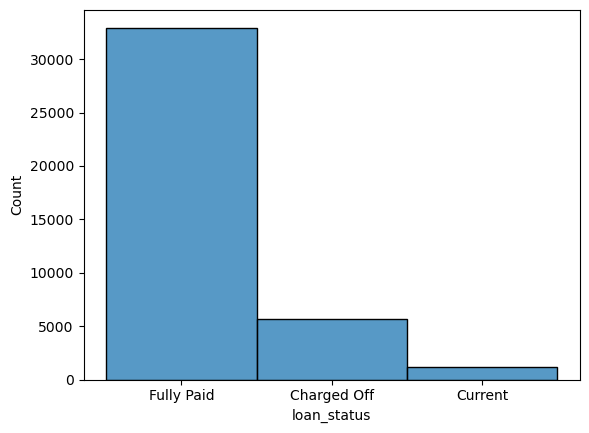

In [20]:
sns.histplot(x=df['loan_status'])
plt.show()

In [21]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

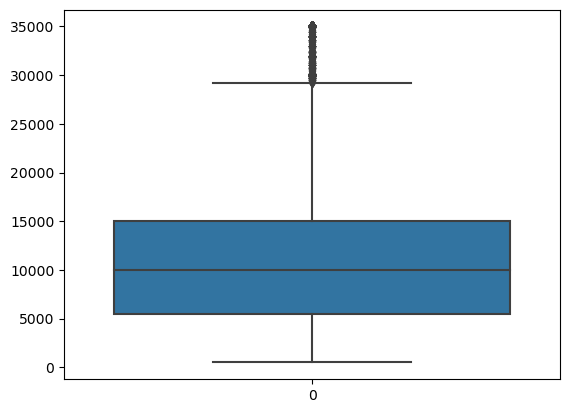

In [22]:
sns.boxplot(df['loan_amnt'])
plt.show()

In [23]:
df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

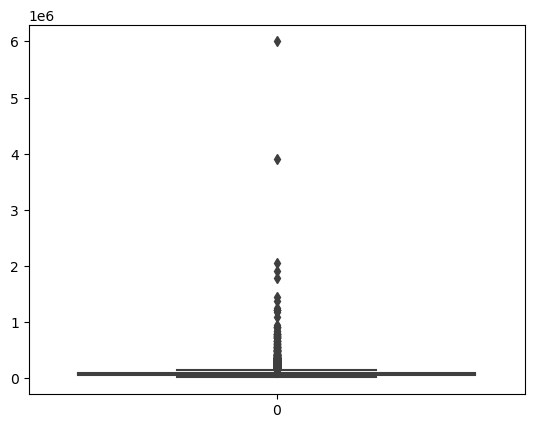

In [24]:
sns.boxplot(df['annual_inc'])
plt.show()

### Bivariant Study

<function matplotlib.pyplot.show(close=None, block=None)>

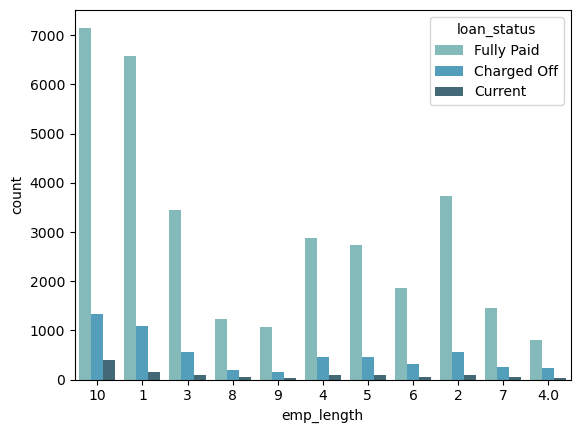

In [25]:
#df['emp_length']=df['emp_length'].astype(str)
#sns.histplot(x=df['emp_length'])
#plt.show()

sns.countplot(x=df["emp_length"],hue=df['loan_status'],palette='GnBu_d')
plt.show

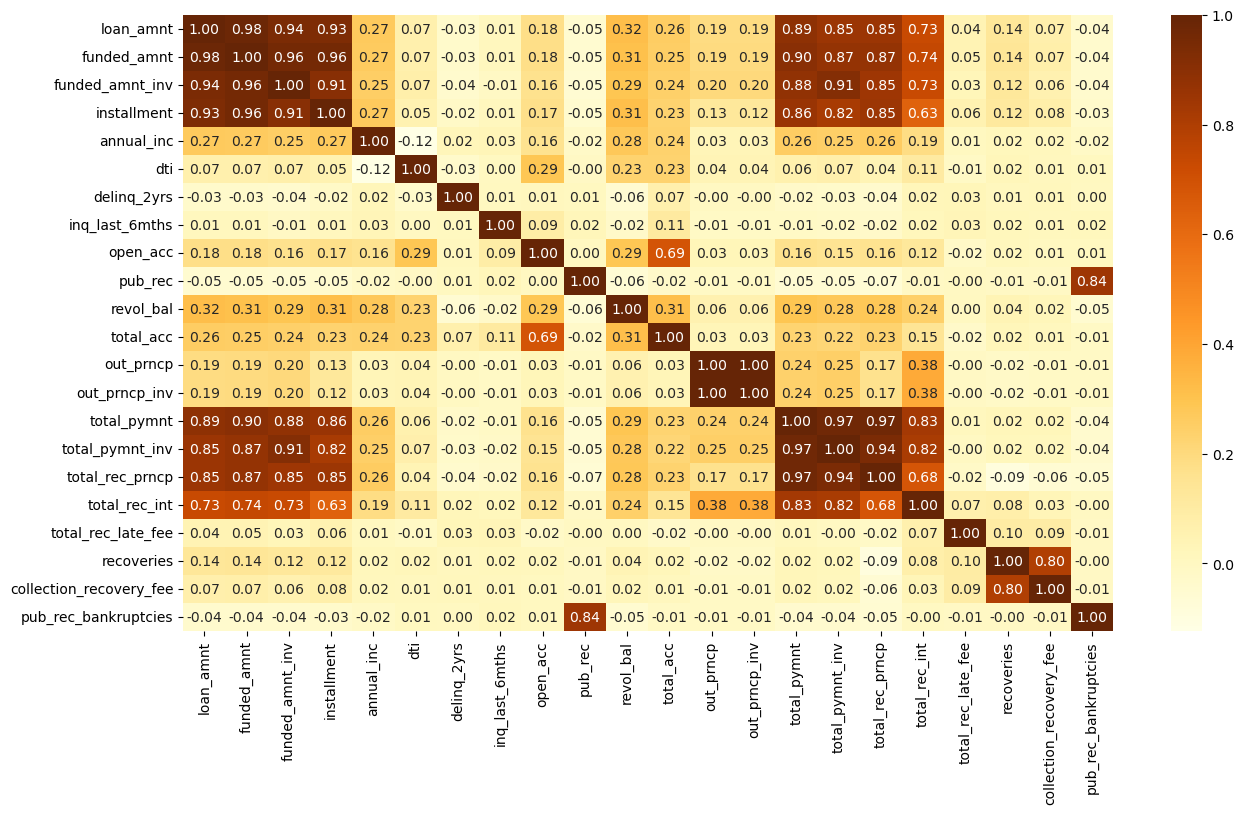

In [26]:
plt.figure(figsize=(15,8))
#sns.heatmap(df.corr(),annot=True,fmt='.2f')
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='YlOrBr')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

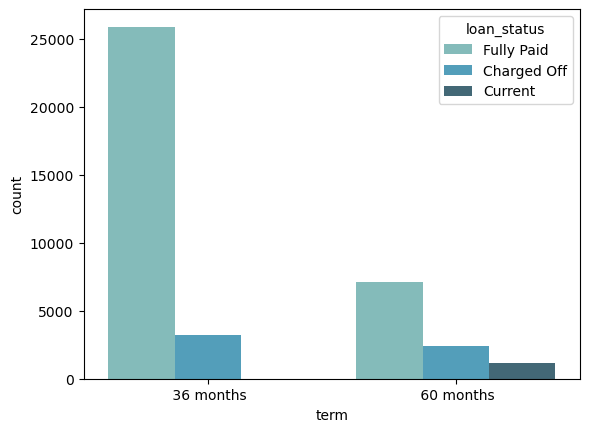

In [27]:
sns.countplot(x=df["term"],hue=df['loan_status'],palette='GnBu_d')
plt.show